Australian


C:\Users\Jacky\AppData\Local\Temp\ipykernel_22884\3233431388.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


BreastCancer
College
GEOBIA
Glass
Glass1
GlaucomaM
HeartDisease
LED-display-domain-7digit
Pima1
SPECTF
Sonar
abalone19
abalone9-18
analcatdata_authorship
analcatdata_dmft
autos
balance-scale
bands
blood-transfusion-service-center
bodyfat
breasttissue
bupa
chscase_geyser1
cleveland-0_vs_4
clevend
climate-model-simulation-crashes
cloud
colic
collins
column3C
confidence
credit-a
credit-g
cylinder-bands
dermatology-6
diabetes
dresses-sales
ecol-0-1-4-7_vs_2-3-5-6
ecoli-0-1-4-7_vs_2-3-5-6
ecoli-0-2-3-4_vs_5
ecoli-0-3-4_vs_5
ecoli-0-6-7_vs_3-5
ecoli-0_vs_1
ecoli1
ecoli2
ecoli3
ecoli4
eucalyptus
fertility
fruitfly
glass-0-1-2-3_vs_4-5-6
glass-0-1-6_vs_2
glass-0-1-6_vs_5
glass-0-4_vs_5
glass-0-6_vs_5
glass0
glass2
glass4
glass5
glass6
grub-damage
haberman
hayes-roth
heart
heart-h
heart-statlog
hepatitis
horse-colic
hungarian
image-segmentation
indian_liver_patient
ionosphere
iris
kc2
labor
leaf
led-display
lens
libras
lung-cancer
lymphography
machine_cpu
mammographic
monks-problems-2
monks-pro

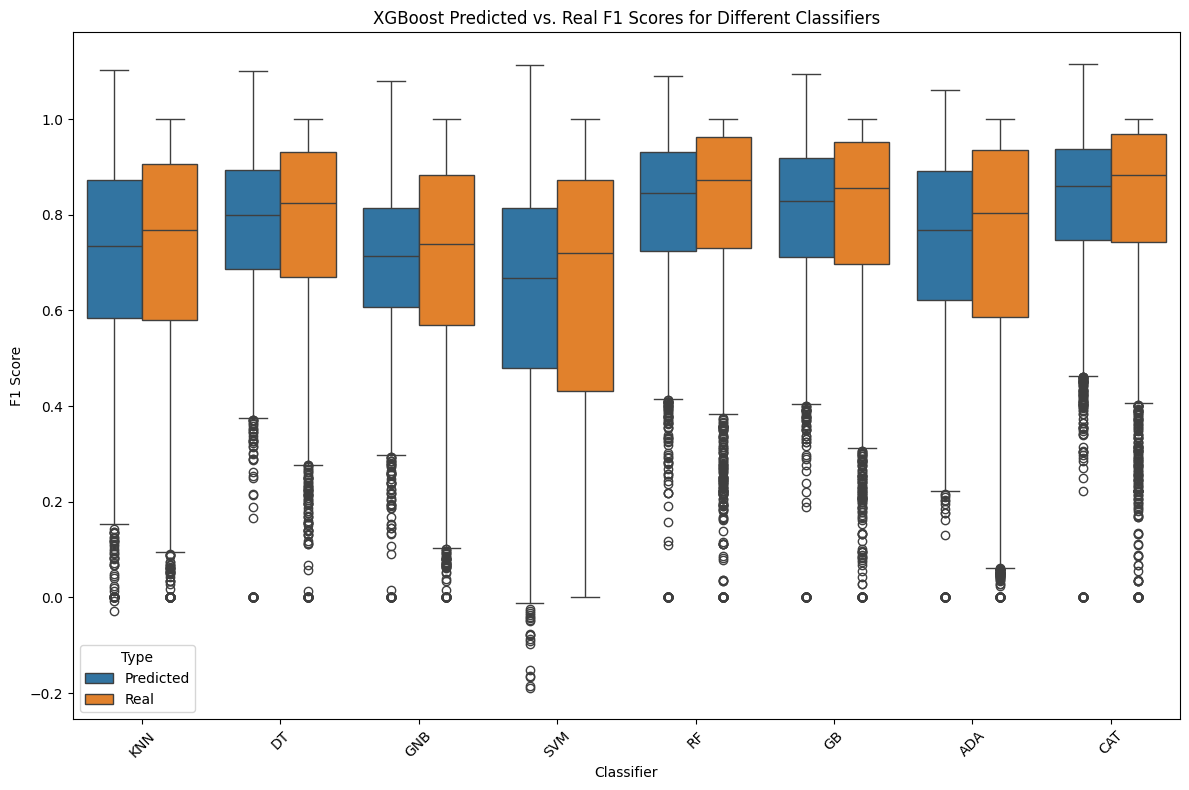

In [1]:
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

fields = ['Test_dataset', 'Classifier', 'F1', 'G-mean', 'Accuracy', 'Precision', 'Recall','ROC_AUC','PR_AUC','Balanced_Accuracy','CWA']
df = pd.read_csv("C:/Ronald/uOttawa/CSI 6900/Metallic-main/Metafeature/features.csv")
dataset_names=list(df['Dataset'])
names=np.unique(dataset_names)
results_df = pd.DataFrame(columns=['Classifier', 'Dataset', 'Metric', 'Value', 'Type'])
for j in ['KNN','DT','GNB','SVM','RF','GB','ADA','CAT']:
    for i in names:
        print(i)
        # for metric in ['F1','G-mean','Accuracy','Precision','Recall','AUC-ROC','AUC-PR','BalancedAccuracy','CWA']:
        for metric in ['F1']:
            dataframe = df[df['Dataset'] != i]
            x_test_sample = df[df['Dataset'] == i]
            x_test_selected = x_test_sample[x_test_sample[j] == 1]
            y_test = np.array(x_test_selected[metric])
            x_test = x_test_selected.iloc[:, 1:50]
            x_test_sample=x_test.iloc[:,28:]
            count1=1
            sample_not_present=[]
            for kk in range(0,21):
                sample1=list(x_test_sample.iloc[:,kk])
                if 1 not in sample1:
                    sample_not_present.append(count1)
                count1=count1+1
            selected_dataframe = dataframe[dataframe[j] == 1]
            y_train = np.array(selected_dataframe[metric])
            x_train = selected_dataframe.iloc[:, 1:50]
            model = xg.XGBRegressor(objective ='reg:squarederror',colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3,
                                    min_child_weight=1.5,n_estimators=10000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, seed=42)
            x_train = np.array(x_train)
            y_train[np.isnan(y_train)] = 0
            model.fit(np.array(x_train), y_train)
            y_pred = list(model.predict(np.array(x_test)))
            if len(y_pred) != 21:
                for ii in sample_not_present:
                    y_pred.insert(int(ii)-1,0)
            y_pred = pd.DataFrame(y_pred)

            y_test=list(y_test)
            if len(y_test)!=21:
                for ij in sample_not_present:
                    y_test.insert(int(ij)-1,0)
            y_test=pd.DataFrame(y_test)

            for value, value_type in zip([y_pred, y_test], ['Predicted', 'Real']):
                temp_df = pd.DataFrame({
                    'Classifier': [j] * len(value),
                    'Dataset': [i] * len(value),
                    'Metric': ['F1'] * len(value),  
                    'Value': value.squeeze().tolist(),
                    'Type': [value_type] * len(value)
                })
                results_df = pd.concat([results_df, temp_df], ignore_index=True)


plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, x='Classifier', y='Value', hue='Type')
plt.title('XGBoost Predicted vs. Real F1 Scores for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.legend(title='Type')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [2]:
results_df

,Classifier,Dataset,Metric,Value,Type
0,KNN,Australian,F1,0.582381,Predicted
1,KNN,Australian,F1,0.715224,Predicted
2,KNN,Australian,F1,0.639587,Predicted
3,KNN,Australian,F1,0.905998,Predicted
4,KNN,Australian,F1,0.708726,Predicted
...,...,...,...,...,...
52075,CAT,zoo-3,F1,0.222222,Real
52076,CAT,zoo-3,F1,0.466667,Real
52077,CAT,zoo-3,F1,0.000000,Real
52078,CAT,zoo-3,F1,0.222222,Real
